In [1]:
import pandas as pd

try:
    df_train = pd.read_excel("train (2).xlsx")
    df_eval = pd.read_excel("evaluation (2).xlsx")
    print(df_train.shape)
    print(df_eval.shape)
except FileNotFoundError:
    print("Error: One or both of the Excel files were not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

(2061, 3)
(9000, 3)


## Data exploration

### Subtask:
Explore the training and evaluation datasets to understand the data distribution and identify potential issues.


**Reasoning**:
Explore the data distribution, missing values, text length, and class balance in the training and evaluation datasets.



Training Dataset Target Distribution:
label
1    100.0
Name: proportion, dtype: float64


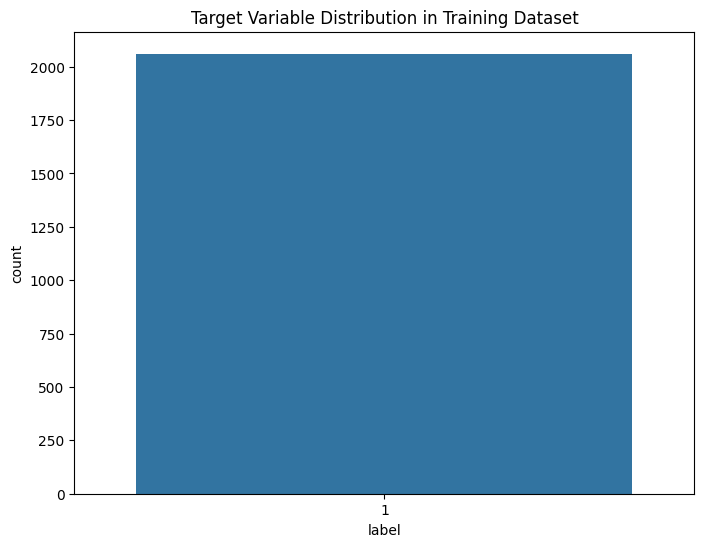


Evaluation Dataset Target Distribution:
label
0    66.655556
1    33.344444
Name: proportion, dtype: float64


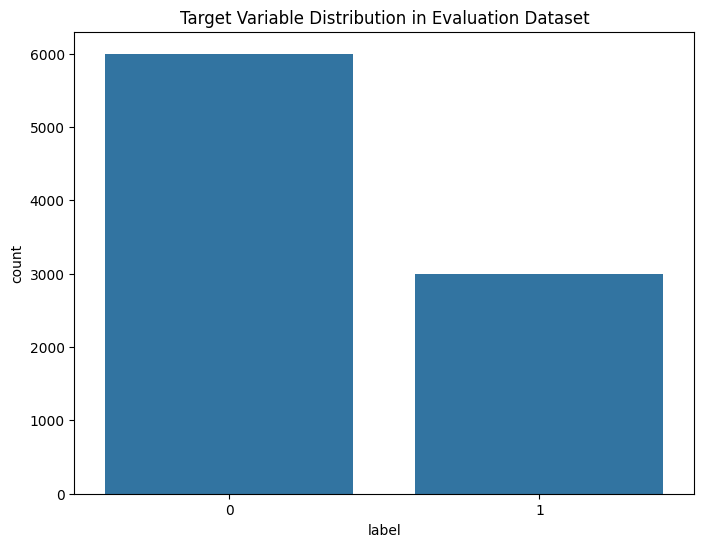


Missing Values in Training Dataset:
text      0
reason    0
label     0
dtype: int64

Missing Values in Evaluation Dataset:
text      0
reason    0
label     0
dtype: int64

Descriptive Statistics for Text Length (Training):
count    2061.000000
mean       59.859292
std        35.686412
min        13.000000
25%        36.000000
50%        49.000000
75%        71.000000
max       310.000000
Name: text_length, dtype: float64

Descriptive Statistics for Reason Length (Training):
count    2061.000000
mean       30.748180
std        10.599283
min        11.000000
25%        23.000000
50%        29.000000
75%        36.000000
max        83.000000
Name: reason_length, dtype: float64

Descriptive Statistics for Text Length (Evaluation):
count    9000.000000
mean       91.129000
std        79.820403
min        12.000000
25%        41.000000
50%        66.000000
75%       110.000000
max       983.000000
Name: text_length, dtype: float64

Descriptive Statistics for Reason Length (Evaluation):
co

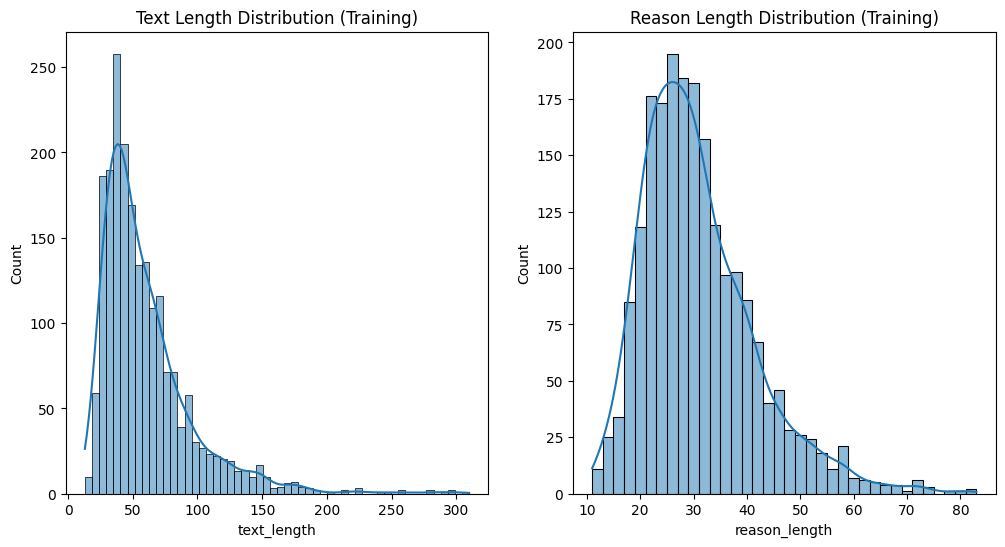

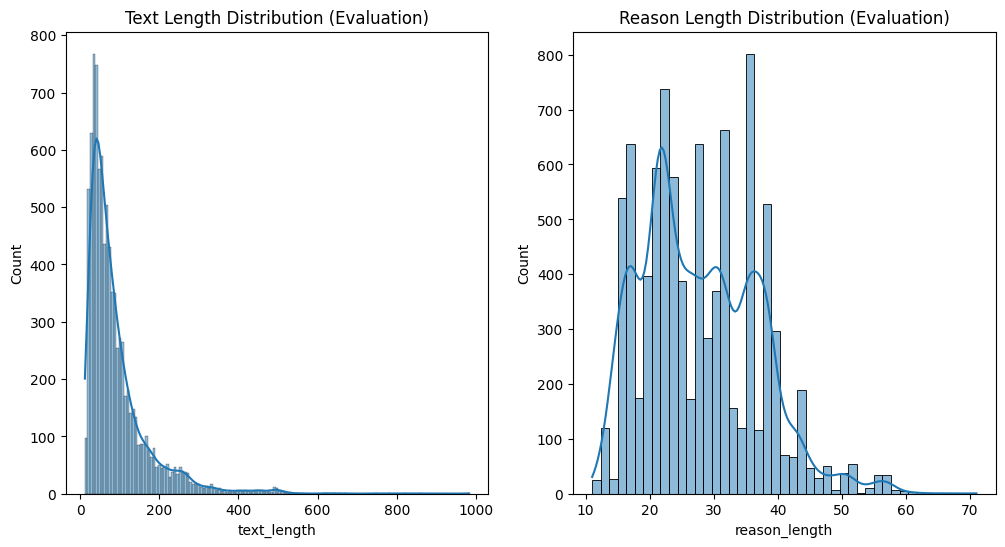

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


print("Training Dataset Target Distribution:")
print(df_train['label'].value_counts(normalize=True) * 100)
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df_train)
plt.title('Target Variable Distribution in Training Dataset')
plt.show()

print("\nEvaluation Dataset Target Distribution:")
print(df_eval['label'].value_counts(normalize=True) * 100)
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df_eval)
plt.title('Target Variable Distribution in Evaluation Dataset')
plt.show()

# 2. Missing Values
print("\nMissing Values in Training Dataset:")
print(df_train.isnull().sum())
print("\nMissing Values in Evaluation Dataset:")
print(df_eval.isnull().sum())



df_train['text_length'] = df_train['text'].str.len()
df_train['reason_length'] = df_train['reason'].str.len()
df_eval['text_length'] = df_eval['text'].str.len()
df_eval['reason_length'] = df_eval['reason'].str.len()

print("\nDescriptive Statistics for Text Length (Training):")
print(df_train['text_length'].describe())
print("\nDescriptive Statistics for Reason Length (Training):")
print(df_train['reason_length'].describe())
print("\nDescriptive Statistics for Text Length (Evaluation):")
print(df_eval['text_length'].describe())
print("\nDescriptive Statistics for Reason Length (Evaluation):")
print(df_eval['reason_length'].describe())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_train['text_length'], kde=True)
plt.title('Text Length Distribution (Training)')
plt.subplot(1, 2, 2)
sns.histplot(df_train['reason_length'], kde=True)
plt.title('Reason Length Distribution (Training)')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_eval['text_length'], kde=True)
plt.title('Text Length Distribution (Evaluation)')
plt.subplot(1, 2, 2)
sns.histplot(df_eval['reason_length'], kde=True)
plt.title('Reason Length Distribution (Evaluation)')
plt.show()




## Data augmentation

### Subtask:
Augment the training data to address the class imbalance.  The current training data is heavily skewed towards the positive class (label 1).  Generate synthetic samples for the negative class (label 0) to balance the dataset.


**Reasoning**:
Generate synthetic samples for the negative class (label 0) using mismatched pairs and synonym replacement, and integrate them into the df_train DataFrame.



In [3]:
import random
import nltk
from nltk.corpus import wordnet


try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name())
    return list(set(synonyms))


def augment_data(df, n_samples):
    augmented_data = []
    negative_samples = df[df['label'] == 0]

    for _ in range(n_samples):

        idx1 = random.randint(0, len(df) - 1)
        idx2 = random.randint(0, len(df) - 1)
        new_text = df.loc[idx1, 'text']
        new_reason = df.loc[idx2, 'reason']
        augmented_data.append([new_text, new_reason, 0])


        if not negative_samples.empty:
            idx = random.randint(0, len(negative_samples) - 1)
            text = negative_samples.iloc[idx]['text']
            reason = negative_samples.iloc[idx]['reason']
            words = text.split()
            new_words = []
            for word in words:
                synonyms = get_synonyms(word)
                if synonyms and random.random() < 0.3:
                    new_words.append(random.choice(synonyms))
                else:
                    new_words.append(word)
            new_text = " ".join(new_words)
            words = reason.split()
            new_words = []
            for word in words:
                synonyms = get_synonyms(word)
                if synonyms and random.random() < 0.3:
                    new_words.append(random.choice(synonyms))
                else:
                    new_words.append(word)
            new_reason = " ".join(new_words)
            augmented_data.append([new_text, new_reason, 0])

    return augmented_data



num_samples_to_generate = 1861

augmented_samples = augment_data(df_train, num_samples_to_generate)
augmented_df = pd.DataFrame(augmented_samples, columns=['text', 'reason', 'label'])
df_train = pd.concat([df_train, augmented_df], ignore_index=True)
display(df_train.head())
print(df_train['label'].value_counts())

[nltk_data] Downloading package wordnet to /root/nltk_data...


,text,reason,label,text_length,reason_length
0,this is an amazing app for online classes!but,good app for conducting online classes,1,45.0,38.0
1,very practical and easy to use,app is user-friendly,1,30.0,20.0
2,this app is very good for video conferencing.,good for video conferencing,1,45.0,27.0
3,i can not download this zoom app,unable to download zoom app,1,32.0,27.0
4,i am not able to download this app,want to download the app,1,34.0,24.0


label
1    2061
0    1861
Name: count, dtype: int64


## Data preparation

### Subtask:
Clean and preprocess the text and reason columns in both the training and evaluation datasets.


In [4]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Punctuation Removal
    text = re.sub(r'[^\w\s]', '', text)
    # Special Character Handling (Removing)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Stop Word Removal
    tokens = [w for w in tokens if not w in stop_words]
    # Stemming
    tokens = [stemmer.stem(w) for w in tokens]
    return tokens


df_train['text_tokens'] = df_train['text'].apply(preprocess_text)
df_train['reason_tokens'] = df_train['reason'].apply(preprocess_text)
df_eval['text_tokens'] = df_eval['text'].apply(preprocess_text)
df_eval['reason_tokens'] = df_eval['reason'].apply(preprocess_text)



df_train = df_train[df_train['text_tokens'].map(len) > 0]
df_train = df_train[df_train['reason_tokens'].map(len) > 0]
df_eval = df_eval[df_eval['text_tokens'].map(len) > 0]
df_eval = df_eval[df_eval['reason_tokens'].map(len) > 0]

display(df_train.head())
display(df_eval.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,reason,label,text_length,reason_length,text_tokens,reason_tokens
0,this is an amazing app for online classes!but,good app for conducting online classes,1,45.0,38.0,"[amaz, app, onlin, classesbut]","[good, app, conduct, onlin, class]"
1,very practical and easy to use,app is user-friendly,1,30.0,20.0,"[practic, easi, use]","[app, userfriendli]"
2,this app is very good for video conferencing.,good for video conferencing,1,45.0,27.0,"[app, good, video, conferenc]","[good, video, conferenc]"
3,i can not download this zoom app,unable to download zoom app,1,32.0,27.0,"[download, zoom, app]","[unabl, download, zoom, app]"
4,i am not able to download this app,want to download the app,1,34.0,24.0,"[abl, download, app]","[want, download, app]"


,text,reason,label,text_length,reason_length,text_tokens,reason_tokens
0,the app is crashing when i play a vedio,app crashes during playback,1,39,27,"[app, crash, play, vedio]","[app, crash, playback]"
1,but i want to connect it to the tv from one de...,want compatibility with more smart televisions,0,61,46,"[want, connect, tv, one, devic, anoth]","[want, compat, smart, televis]"
2,very helpful when and home working remotley,good app for work,0,43,17,"[help, home, work, remotley]","[good, app, work]"
3,this zoom so called and missed call and mobile...,receiving incorrect phone number message,0,53,40,"[zoom, call, miss, call, mobil, number]","[receiv, incorrect, phone, number, messag]"
4,one of my favorite apps,good for spending time,0,23,22,"[one, favorit, app]","[good, spend, time]"


In [6]:
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

def encode_text_reason_pair(text_tokens, reason_tokens):
    text = " ".join(text_tokens)
    reason = " ".join(reason_tokens)
    encoded_pair = tokenizer(
        text,
        reason,
        padding='max_length',
        truncation=True,
        max_length=128,
        return_tensors='pt'
    )
    return {
        'input_ids': encoded_pair['input_ids'].squeeze(0),
        'attention_mask': encoded_pair['attention_mask'].squeeze(0)
    }


df_train['encoded_input'] = df_train.apply(
    lambda row: encode_text_reason_pair(row['text_tokens'], row['reason_tokens']),
    axis=1
)

df_eval['encoded_input'] = df_eval.apply(
    lambda row: encode_text_reason_pair(row['text_tokens'], row['reason_tokens']),
    axis=1
)


print(df_train['encoded_input'].head())
print(df_eval['encoded_input'].head())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

0    {'input_ids': [tensor(101), tensor(25933), ten...
1    {'input_ids': [tensor(101), tensor(10975), ten...
2    {'input_ids': [tensor(101), tensor(10439), ten...
3    {'input_ids': [tensor(101), tensor(8816), tens...
4    {'input_ids': [tensor(101), tensor(11113), ten...
Name: encoded_input, dtype: object
0    {'input_ids': [tensor(101), tensor(10439), ten...
1    {'input_ids': [tensor(101), tensor(2215), tens...
2    {'input_ids': [tensor(101), tensor(2393), tens...
3    {'input_ids': [tensor(101), tensor(24095), ten...
4    {'input_ids': [tensor(101), tensor(2028), tens...
Name: encoded_input, dtype: object


## Data splitting

### Subtask:
Split the augmented training data into training and validation sets.


In [7]:
from sklearn.model_selection import train_test_split


X = df_train['encoded_input'].tolist()
y = df_train['label'].tolist()

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Model training

### Subtask:
Train a transformer model for binary classification.


In [8]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.2 MB/s eta 0:00:00


**Reasoning**:
Retry the model training after installing the missing package.



**Reasoning**:
Fix the TypeError by removing the `evaluation_strategy` argument, which is not supported in the current version of `transformers`.



**Reasoning**:
The error `TypeError: list indices must be integers or slices, not list` occurs because `self.encodings[idx]` is a list, and you're trying to use a list as an index.  I need to access the elements of the list using integer indices. Also, the `encoded_input` column in the dataframe contains dictionaries, so I need to modify the `__getitem__` method to handle this correctly.



In [10]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
import torch
from datasets import Dataset


train_data = {
    'input_ids': [x['input_ids'].tolist() for x in X_train],
    'attention_mask': [x['attention_mask'].tolist() for x in X_train],
    'labels': y_train
}
val_data = {
    'input_ids': [x['input_ids'].tolist() for x in X_val],
    'attention_mask': [x['attention_mask'].tolist() for x in X_val],
    'labels': y_val
}


train_dataset = Dataset.from_dict(train_data)
val_dataset = Dataset.from_dict(val_data)



model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    save_strategy="no",
    learning_rate=2e-5,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)


trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: lokeshlearn1 (lokeshlearn1-meenakshi-college) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
10,0.691900
20,0.691400
30,0.676600
40,0.681500
50,0.678200
60,0.679700
70,0.657000
80,0.647200
90,0.643800
100,0.597500


TrainOutput(global_step=591, training_loss=0.2812194318121359, metrics={'train_runtime': 221.4837, 'train_samples_per_second': 42.491, 'train_steps_per_second': 2.668, 'total_flos': 619034535498240.0, 'train_loss': 0.2812194318121359, 'epoch': 3.0})

## Model optimization

### Subtask:
Optimize the trained BERT model by evaluating its performance on the validation set and potentially adjusting hyperparameters.


**Reasoning**:
Evaluate the trained model on the validation set and analyze the results.  If needed, adjust hyperparameters and retrain.



In [11]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

eval_results = trainer.evaluate()
print(eval_results)

predictions = trainer.predict(val_dataset)

predicted_labels = predictions.predictions.argmax(-1)

# Calculate metrics
accuracy = accuracy_score(y_val, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(y_val, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

{'eval_loss': 0.1731303632259369, 'eval_runtime': 5.5872, 'eval_samples_per_second': 140.5, 'eval_steps_per_second': 2.327, 'epoch': 3.0}
Accuracy: 0.9592356687898089
Precision: 0.9594700835599259
Recall: 0.9592356687898089
F1-score: 0.9592531637558644


## Model evaluation

### Subtask:
Evaluate the final model's performance on the held-out evaluation dataset.


In [12]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import numpy as np


eval_data = {
    'input_ids': [x['input_ids'].tolist() for x in df_eval['encoded_input'].tolist()],
    'attention_mask': [x['attention_mask'].tolist() for x in df_eval['encoded_input'].tolist()],
    'labels': df_eval['label'].tolist()
}
eval_dataset = Dataset.from_dict(eval_data)


predictions = trainer.predict(eval_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)


accuracy = accuracy_score(df_eval['label'], predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(df_eval['label'], predicted_labels, average='weighted')
conf_matrix = confusion_matrix(df_eval['label'], predicted_labels)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.6252222222222222
Precision: 0.7248351345685308
Recall: 0.6252222222222222
F1-score: 0.6327027562974861
Confusion Matrix:
[[3163 2836]
 [ 537 2464]]


In [13]:
import numpy as np
from datasets import Dataset


eval_data = {
    'input_ids': [x['input_ids'].tolist() for x in df_eval['encoded_input'].tolist()],
    'attention_mask': [x['attention_mask'].tolist() for x in df_eval['encoded_input'].tolist()],
    'labels': df_eval['label'].tolist()
}
eval_dataset = Dataset.from_dict(eval_data)


predictions = trainer.predict(eval_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)


df_eval['predicted_label'] = predicted_labels

In [14]:

print(df_eval[['text', 'reason', 'label', 'predicted_label']].head())

                                                text  \
0            the app is crashing when i play a vedio   
1  but i want to connect it to the tv from one de...   
2        very helpful when and home working remotley   
3  this zoom so called and missed call and mobile...   
4                            one of my favorite apps   

                                           reason  label  predicted_label  
0                     app crashes during playback      1                1  
1  want compatibility with more smart televisions      0                0  
2                               good app for work      0                1  
3        receiving incorrect phone number message      0                1  
4                          good for spending time      0                0  


In [15]:
df_eval.to_csv('predicted_output.csv', index=False)

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:

conf_matrix = confusion_matrix(df_eval['label'], df_eval['predicted_label'])


print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[3163 2836]
 [ 537 2464]]


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

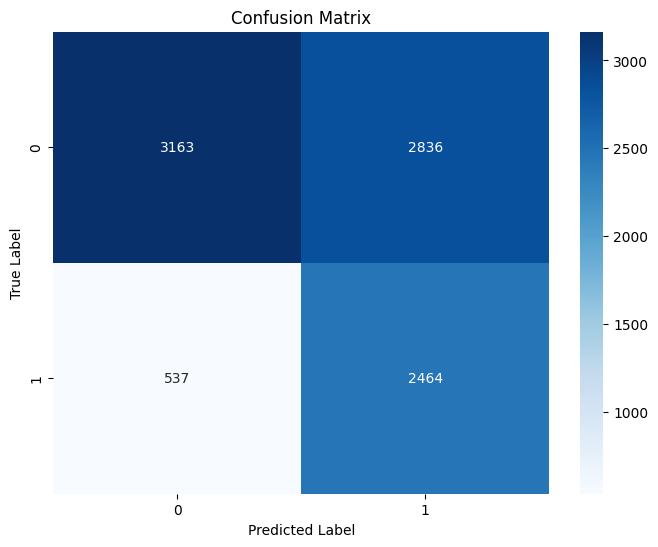

In [19]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [21]:

class_frequencies = df_train['label'].value_counts()
print(class_frequencies)

label
1    2061
0    1861
Name: count, dtype: int64


In [22]:

majority_class_frequency = class_frequencies.max()
minority_class_frequency = class_frequencies.min()
class_ratio = majority_class_frequency / minority_class_frequency

imbalance_threshold = 1.5


if class_ratio > imbalance_threshold:
    print("Dataset is imbalanced.")
else:
    print("Dataset is balanced.")

Dataset is balanced.


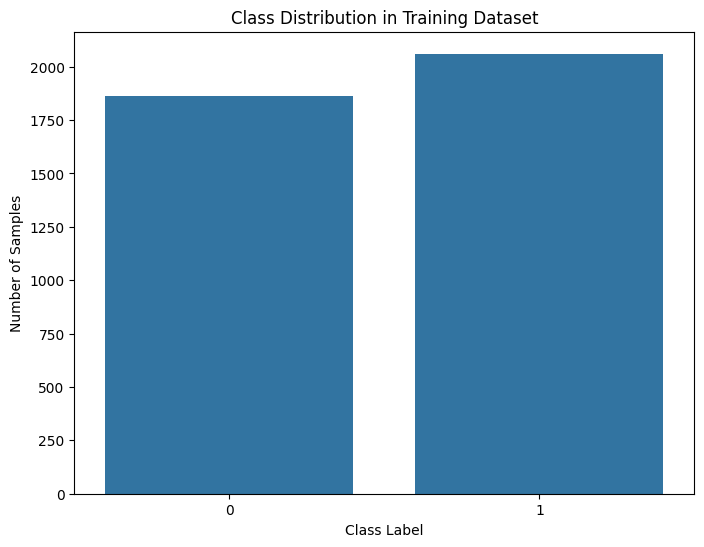

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


class_counts = df_train['label'].value_counts()

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.countplot(x='label', data=df_train)
plt.title('Class Distribution in Training Dataset')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.show()

In [27]:
import torch

def predict_input(text, reason, model, tokenizer):

    text_tokens = preprocess_text(text)
    reason_tokens = preprocess_text(reason)


    encoded_input = tokenizer(
        " ".join(text_tokens),
        " ".join(reason_tokens),
        padding='max_length',
        truncation=True,
        max_length=128,
        return_tensors='pt'
    )


    device = next(model.parameters()).device
    encoded_input = {k: v.to(device) for k, v in encoded_input.items()}


    with torch.no_grad():
        outputs = model(**encoded_input)
        predicted_label = torch.argmax(outputs.logits).item()

    return predicted_label


text = input("Enter the text: ")
reason = input("Enter the reason: ")


predicted_label = predict_input(text, reason, model, tokenizer)
print(f"Predicted Label: {predicted_label}")

Enter the text: iphone is a good product
Enter the reason: its so hard to use and battery capacity is low and heating issue
Predicted Label: 0
